# 利用資料探索掌握 FACEBOOK 用戶輪廓

### 前言

  >企業的資源是有限的，因此，通常會需要了解 TA (Target audience)，並針對有效的管道投放廣告，推送合適的促銷，以助於提升公司的營收、增加客戶體驗及提升客戶留存。  
  >接下來會利用Python針對FACEBOOK的會員資料，進行資料探索。透過分析此資料，可以了解會員輪廓，以利於後續精準行銷進行。  

資料集來源 : https://www.kaggle.com/sheenabatra/facebook-data 

### 導入工具包 / 資料集

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('./pseudo_facebook.csv', encoding = 'utf-8')
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [3]:
df.tail()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756
99002,1397896,39,15,1974,5,female,397.0,2049,768,9410,12443,9410,9530,0,2913


### 資料觀察

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

從info，可看到此資料集中含有15欄，99003筆會員資料，`其中「gender」、「tenure」欄含有空值`，各欄位資訊如下：  
- userid 用戶id  
- age 用戶年齡  
- dob_day/year/month 用戶出生年月日  
- gender 用戶性別  
- tenure 帳號存在天數  
- friend_count 好友數  
- friendships_initiated 好友互動關係  
- likes 按讚總數  
- likes_received 獲讚總數  
- mobile_likes  按讚數(行動裝置)  
- mobile_likes_received 獲讚數(行動裝置)  
- www_likes 按讚數(網頁)  
- www_likes_received 獲讚數(網頁)

### 檢查資料是否有異常

In [5]:
df.nunique() # age有異常

userid                   99003
age                        101
dob_day                     31
dob_year                   101
dob_month                   12
gender                       2
tenure                    2426
friend_count              2562
friendships_initiated     1519
likes                     2924
likes_received            2681
mobile_likes              2396
mobile_likes_received     2004
www_likes                 1726
www_likes_received        1636
dtype: int64

In [6]:
likes_chk = df['likes'].sum() - df['mobile_likes'].sum() - df['www_likes'].sum()
likes_received_chk = df['likes_received'].sum() - df['mobile_likes_received'].sum() - df['www_likes_received'].sum()

print(f'likes_chk:{likes_chk}')
print(f'likes_received_chk:{likes_received_chk}')

# 總按讚數及總獲讚數有異常(行動裝置按讚數＋網頁按讚數!=總按讚數; 行動裝置獲讚數＋網頁獲讚數!=總獲讚數)


likes_chk:6
likes_received_chk:4


從nunique，可確定每個用戶id都是唯一值，而其中`較有疑問的欄位為「age」，理論上用戶年齡不太會有101種那麼多，因101種代表0-100歲都有用戶`，用戶年齡若介於15-80歲之間，頂多也僅有60-70種，故先將此欄位標記異常。 

接著，我們知道「likes」欄位是由「mobile_likes」＆「www_likes」兩欄位相加而成；而「likes_received」欄位則是由「mobile_likes_received」＆「www_likes_received」兩欄位相加而成，檢查此兩欄位，發現也有異常，故先標記。

### 資料清洗

In [7]:
# 空值處理
print('nan value in each columns:')
print(df.isnull().sum())


nan value in each columns:
userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64


In [8]:
df = df.dropna(subset = ['gender'])
df['tenure'] = df['tenure'].fillna((df['tenure'].mean()))


從上可知「gender」及「tenure」兩欄位含有空值，依現今資料搜集能力，可以推斷不太可能是因為系統原因，導致沒有搜集到相關資料，大多時候可能是消費者不願意填寫個資，才導致此兩欄位含有空值。  
針對「gender」欄空值的處理，因目前已約蒐集到90000筆會員資料，其中僅100多筆資料含有空值，因此，將空值直接移除是較符合效益的；而針對「tenure」欄的空值，因其為數值型資料，故依平均數為其補值。

**⇣ 檢查資料時有發現「age」「likes」「likes_received」此三個欄有異常針對其做離群值處理**

<AxesSubplot: >

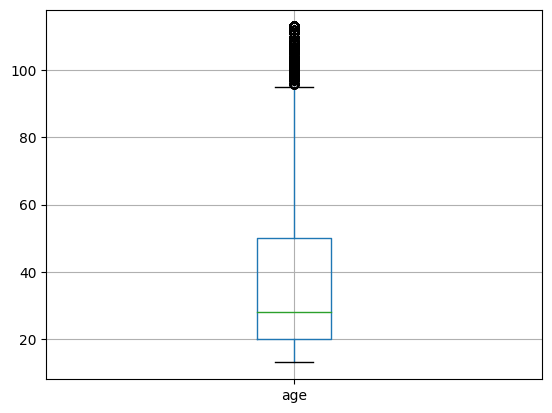

In [9]:
# "age"離群值處理
df.boxplot('age')

In [10]:
df['age'].describe()

count    98828.000000
mean        37.213826
std         22.525543
min         13.000000
25%         20.000000
50%         28.000000
75%         50.000000
max        113.000000
Name: age, dtype: float64

In [11]:
iqr = df['age'].quantile(0.75) - df['age'].quantile(0.25)
Lower_fence = df['age'].quantile(0.25) - 1.5 * iqr
Upper_fence = df['age'].quantile(0.75) + 1.5 * iqr
print(f'IQR={iqr}')
print(f'Lower_fence={Lower_fence}')
print(f'Upper_fence={Upper_fence}')

df = df.loc[(df['age']>= -25) & (df['age']<= 95)]
df['age'].describe()


IQR=30.0
Lower_fence=-25.0
Upper_fence=95.0


count    94569.000000
mean        34.160793
std         17.700163
min         13.000000
25%         20.000000
50%         27.000000
75%         46.000000
max         95.000000
Name: age, dtype: float64

在處理「age」欄離群值前，可觀察到最小值為13歲，看起來是合理的；而最大值則到113歲是不太合理的，因此，針對此欄位做離群值處理，處理完後，約剔除4000筆資料

In [12]:
# "likes" "likes_received" 處理
df['likes_chk'] = df['likes'] - df['mobile_likes'] - df['www_likes']
df['likes_received_chk'] = df['likes_received'] - df['mobile_likes_received'] - df['www_likes_received']

## 保留正確的資料
df = df.loc[(df['likes_chk']==0) & (df['likes_received_chk']==0)]

print(df['likes_chk'].describe())
print('==========')
print(df['likes_received_chk'].describe())


count    94561.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: likes_chk, dtype: float64
count    94561.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: likes_received_chk, dtype: float64


接著處理「likes」「likes_received」兩欄：  
將按讚總數非行動裝置按讚數加網頁按讚數者刪除  
將獲讚總數非行動裝置獲讚數加網頁獲讚數者刪除  
最後約刪除8筆資料

### 鎖定分析方向
>未來，希望能針對不同年齡或性別，對用戶做精準行銷及進行廣告投放，因此，鎖定帳戶存在天數長及互動性高的帳號，因其有較高機率會點擊廣告

In [13]:
# "gender"欄位做編碼
df['gender'] = pd.Categorical(df['gender']).codes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94561 entries, 0 to 99002
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 94561 non-null  int64  
 1   age                    94561 non-null  int64  
 2   dob_day                94561 non-null  int64  
 3   dob_year               94561 non-null  int64  
 4   dob_month              94561 non-null  int64  
 5   gender                 94561 non-null  int8   
 6   tenure                 94561 non-null  float64
 7   friend_count           94561 non-null  int64  
 8   friendships_initiated  94561 non-null  int64  
 9   likes                  94561 non-null  int64  
 10  likes_received         94561 non-null  int64  
 11  mobile_likes           94561 non-null  int64  
 12  mobile_likes_received  94561 non-null  int64  
 13  www_likes              94561 non-null  int64  
 14  www_likes_received     94561 non-null  int64  
 15  li

In [14]:
# 針對「年齡、性別、互動、帳號存在天數」四個面向做資料視覺化
data = df[['age', 'gender', 'tenure', 'likes', 'likes_received']]


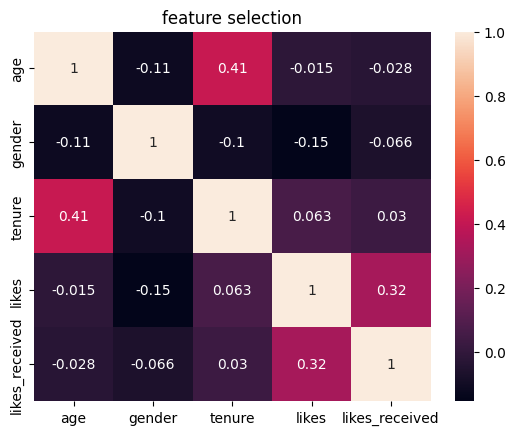

In [15]:
# 相關性 : 年齡、性別、互動、帳號存在天數
cor = data.corr()  ##相關係數
ax = plt.axes()    ##命名一個 ax畫布
sns.heatmap(cor, ax = ax, annot = True)
ax.set_title('feature selection')
plt.show()


根據上圖，可知「年齡、性別、互動、帳號存在天數」四個面向彼此間的關係，  
可以看到年齡跟帳戶存在天數是有高相關性；按讚總數和獲讚總數也呈現出一些相關性

**⇣ 針對年齡資料，畫長條圖，觀察各年齡分佈的情況**

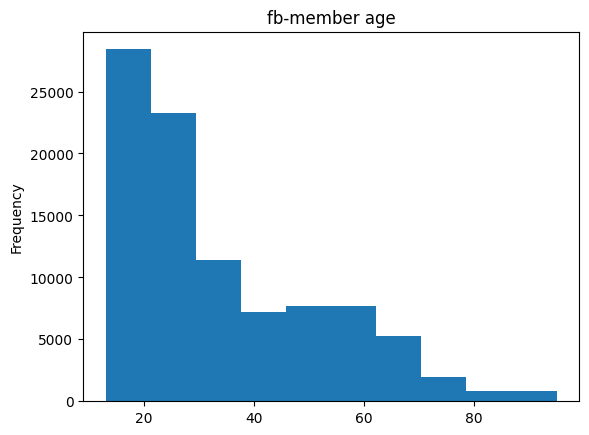

In [16]:
# 年齡長條圖
data["age"].plot(kind="hist",title='fb-member age')
plt.show()


從年齡長條圖可看出低於30歲的使用者約占總會員數一半以上，可知FACEBOOK用戶年齡層較低，因此，後續行銷在進行廣告投放時，應避免銀老保健等產品，因年輕人可能較不會買單

⇣ 針對性別資料，畫圓餅圖，觀察男女佔比

In [17]:
df1 = df.groupby(['gender'])['userid'].count().reset_index()
print(df1)
# gender_female == 0;gender_male == 1

   gender  userid
0       0   38551
1       1   56010


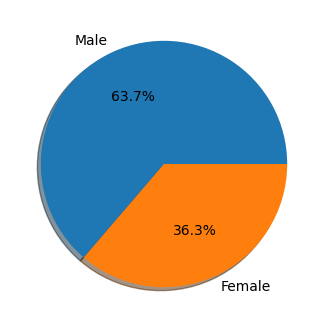

In [18]:
# 性別圓餅圖
df1 = df.groupby(['gender'])['userid'].count().reset_index()
df1['per'] = df['userid'] / len(df) * 100

labels = 'Male', 'Female'
sizes = df1['per'] #數值
fig1, ax1 = plt.subplots(figsize = (4,4)) #文字大小
ax1.pie(sizes, labels = labels,
       autopct = '%1.1f%%', #四捨五入至小數第一位
       shadow = True)

plt.show()


### 初步結論

透過FACEBOOK共9萬名用戶的資料，得出以下分析結論：
1. 約50%用戶低於30歲，整體用戶男女比為 6:4
2. 停留時間與用戶年齡呈高相關性，可再進一步分析兩者的關係

結合上述兩點，後續研究可以「哪種用戶停留時間最久」為方向，判斷誰是忠誠用戶，並針對各族群客製化廣告，如:若20-25歲年輕的男性用戶停留時間長且互動性高，則可以選擇其可能較會喜歡的產品廣告進行投放，如：3C產品、球鞋類、旅遊類等
